### Import your librares

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load your dataset

In [2]:
df= pd.read_csv('seattle_weather.csv')
df.head(15)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


### Handle missing data in PRCP and RAIN columns

In [3]:
df[['PRCP', 'RAIN']].isnull().sum()

PRCP    3
RAIN    3
dtype: int64

In [4]:
df[df.isna().any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [5]:
df['PRCP'].var()

0.05713603840670069

In [6]:
df['RAIN'].var()

0.24462904154362605

In [7]:
df = df.fillna(method="ffill")

In [8]:
df[['PRCP', 'RAIN']].isnull().sum()

PRCP    0
RAIN    0
dtype: int64

In [9]:
df['PRCP'].var()

0.0571306543366205

In [10]:
df['RAIN'].var()

0.24462168866671707

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


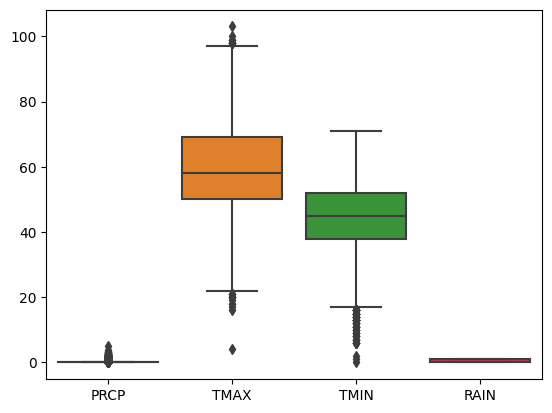

In [11]:
sns.boxplot(data= df);

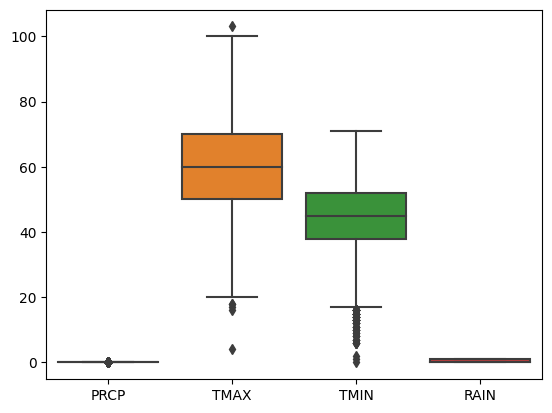

In [12]:
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lowerbound= Q1 - 1.5*(IQR)
higherbound= Q3 + 1.5*(IQR)

df= df.drop(df[(df['PRCP'] > higherbound) | (df['PRCP'] < lowerbound )].index)
sns.boxplot(df);

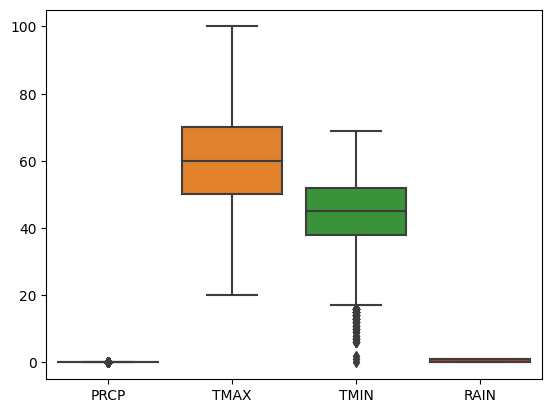

In [13]:
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lowerbound= Q1 - 1.5*(IQR)
higherbound= Q3 + 1.5*(IQR)

df= df.drop(df[(df['TMAX'] > higherbound) | (df['TMAX'] < lowerbound )].index)
sns.boxplot(df);

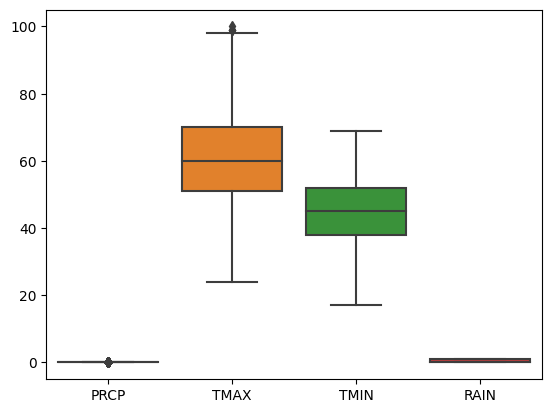

In [14]:
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lowerbound= Q1 - 1.5*(IQR)
higherbound= Q3 + 1.5*(IQR)

df= df.drop(df[(df['TMIN'] > higherbound) | (df['TMIN'] < lowerbound )].index)
sns.boxplot(df);